# <span style="color:#336699">Classificação com MLP</span>
<hr style="border:2px solid #0077b9;">

<br/>

<div style="text-align: center;font-size: 90%;">
    Autor: Flávio Belizário da Silva Mota
    <br/><br/>
    Instituto Nacional de Pesquisas Espaciais (INPE)
    <br/>
    Avenida dos Astronautas, 1758, Jardim da Granja, São José dos Campos, SP 12227-010, Brazil
    <br/><br/>
    Contato: <a href="mailto:flavio.belizario.mota@gmail.com">flavio.belizario.mota@gmail.com</a>
    <br/><br/>
    Data de entrega: 16 de Julho de 2022
    <br>
    Professor: Marcos Goncalves Quiles
</div>

<br/>

<div style="text-align: justify;  margin-left: 25%; margin-right: 25%;">
<b>Objetivo.</b> Esse caderno Jupyter tem como objetivo apresentar o uso do MLP na tarefa de classificação, como parte do Projeto 1 da disciplina de Neurocomputação (CAP-351). Os dados são referentes ao problema de <em>phishing</em>, que é o crime de enganar as pessoas para que compartilhem informações confidenciais como senhas e número de cartões de crédito. Esse problema é considerado uma questão vital na indústria de <em>e-commerce</em>, especialmente <em>e-banking</em>, tendo em vista o número de transações online que envolvem pagamentos. Para construção do conjunto, foram coletados diferentes atributos relacionados a sites legítimos e de <em>phishing</em> considerando 1353 sites diferentes. Os sites de <em>phishing</em> foram coletados do arquivo de dados do Phishtank (www.phishtank.com), que é um site comunitário gratuito onde os usuários podem enviar, verificar, rastrear e compartilhar dados de <em>phishing</em>. Os sites legítimos foram coletados do Yahoo. Existem 548 sites legítimos, 702 URLs de <em>phishing</em> e 103 URLs suspeitos.
</div>

<br/>
<div>
    <b>Os dados podem ser encontrados em:</b>
    <div style="margin-left: 10px; margin-right: 10px">
    https://archive.ics.uci.edu/ml/datasets/Website+Phishing
    </div>
</div>

## Instalando e importando bibliotecas

Instalando a biblioteca *wget* para recuperar o conjunto de dados da *web*:

In [1]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=2c66a87724d0acca0e6f8e347657ea43267b6cb4518efa7c3fcfa78c43eae7ec
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


Importando as bibliotecas:

In [2]:
import wget
from scipy.io import arff
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from numpy.random import seed
seed(42)

## Baixando e carregando os dados:

Baixado os dados da UCI:

In [3]:
url='https://archive.ics.uci.edu/ml/machine-learning-databases/00379/PhishingData.arff'
wget.download(url)

'PhishingData.arff'

Lendo e carregando o arquivo `arff` em um `dataframe`:

In [4]:
data = arff.loadarff('PhishingData.arff')
df = pd.DataFrame(data[0])

# removendo o caracter 'b'
for nome_col in df.columns:
  if df[nome_col].dtype != 'float64':
    df[nome_col] = df[nome_col].apply(lambda col: col.decode('utf-8'))

# codificando os atributos para o tipo numérico
df = df.astype(float)
df

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,0.0,0.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,1.0,1.0,1.0
2,1.0,-1.0,0.0,0.0,-1.0,0.0,-1.0,1.0,0.0,1.0
3,1.0,0.0,1.0,-1.0,-1.0,0.0,1.0,1.0,0.0,0.0
4,-1.0,-1.0,1.0,-1.0,0.0,0.0,-1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
1348,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,0.0,1.0
1349,-1.0,0.0,1.0,0.0,-1.0,0.0,0.0,1.0,0.0,-1.0
1350,-1.0,0.0,-1.0,-1.0,-1.0,0.0,-1.0,-1.0,0.0,1.0
1351,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1.0,0.0,1.0


In [5]:
print("Nosso conjunto de dados tem %s linhas e %s colunas" % 
      (df.shape[0], df.shape[1]))

Nosso conjunto de dados tem 1353 linhas e 10 colunas


Exibindo os atributos e seus tipos:

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SFH                1353 non-null   float64
 1   popUpWidnow        1353 non-null   float64
 2   SSLfinal_State     1353 non-null   float64
 3   Request_URL        1353 non-null   float64
 4   URL_of_Anchor      1353 non-null   float64
 5   web_traffic        1353 non-null   float64
 6   URL_Length         1353 non-null   float64
 7   age_of_domain      1353 non-null   float64
 8   having_IP_Address  1353 non-null   float64
 9   Result             1353 non-null   float64
dtypes: float64(10)
memory usage: 105.8 KB


São 10 atributos, sendo 9 atributos relacionados as características dos sites e 1 (`Result`) como o indicador da classe. São 1353 registros (ou exemplos) e não existem valores nulos.

Quanto as classes, o conjunto apresenta o seguinte:

In [7]:
df.Result.value_counts()

-1.0    702
 1.0    548
 0.0    103
Name: Result, dtype: int64

Sendo:


* -1.0 => sites de *phishing* (702 exemplos)
*  1.0 => sites legítimos (548 exemplos)
*  0.0 => sites suspeitos (103 exemplos)

## Separando o conjunto

Criando as variáveis x e y para armazenar os exemplos e as classes: 

In [8]:
x = df.drop(columns='Result')
y = df.Result
# gerando uma representação categorica das classes
y = to_categorical(y, 3)

Separando o conjunto em treino (80%) e teste (20%) e validação (20% do conjunto de treino):

In [9]:
# set aside 20% of train and test data for evaluation
x_train, x_test, y_train, y_test = train_test_split(x, y,
    test_size=0.2, shuffle = True, random_state = 42)

# Use the same function above for the validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, 
    test_size=0.25, random_state= 42) # 0.25 x 0.8 = 0.2
print(len(x_train), "amostras de treinamento")
print(len(x_val), "amostras de validação")
print(len(x_test), "amostras de teste")

811 amostras de treinamento
271 amostras de validação
271 amostras de teste


## Funções para plotagem dos gráficos

In [10]:
import matplotlib.pyplot as plt

def curvas_erro_acuracia(history):
  fig, ax = plt.subplots(1,2, figsize=(16,8))
  ax[0].plot(history.history['loss'], color='b', label="Treino")
  ax[0].plot(history.history['val_loss'], color='r', label="Validação")
  ax[0].set_xlabel('Épocas')
  ax[0].set_ylabel('Loss')
  legend = ax[0].legend(loc='best', shadow=True)

  ax[1].plot(history.history['accuracy'], color='b', label="Treino")
  ax[1].plot(history.history['val_accuracy'], color='r',label="Validação")
  ax[1].set_xlabel('Épocas')
  ax[1].set_ylabel('Acurácia')
  legend = ax[1].legend(loc='best', shadow=True)

def n_ultimas_epocas(history, n):
  plt.xlabel("Épocas")
  plt.ylabel("Loss")
  plt.plot(history.history['loss'][-n:], label="Treino")
  plt.plot(history.history['val_loss'][-n:], label="Val")
  plt.legend()
  plt.show()



## Modelos

### Modelo 1

MLP com 1 camada oculta com 30 neurônios, 1 camada oculta com 20 neurônios e 3 neurônios na camada de saída.
<br>Função de ativação das camadas ocultas: relu
<br>Função de ativação da camada de saída: softmax

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                300       
                                                                 
 dense_1 (Dense)             (None, 20)                620       
                                                                 
 dense_2 (Dense)             (None, 3)                 63        
                                                                 
Total params: 983
Trainable params: 983
Non-trainable params: 0
_________________________________________________________________


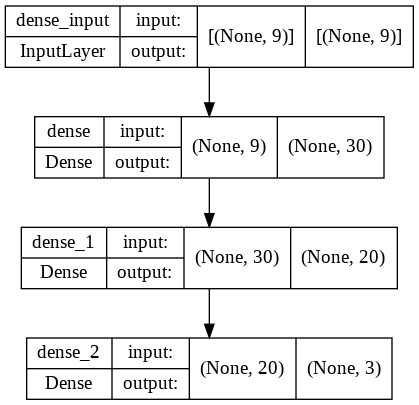

In [11]:
model1 = Sequential()
model1.add(Dense(30, activation='relu', input_shape=(9,)))
model1.add(Dense(20, activation='relu'))
model1.add(Dense(3, activation='softmax'))
model1.summary()
plot_model(model1, show_shapes=True)

Modelo treinado por 100 épocas utilizando o otimizador SGD, crossentropy e acurácia como métrica de acerto:

In [12]:
model1.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
history1 = model1.fit(x_train, y_train, epochs=100,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/100
26/26 [==============================] - 1s 12ms/step - loss: 1.1407 - accuracy: 0.3859 - val_loss: 1.0095 - val_accuracy: 0.4945
Epoch 2/100
26/26 [==============================] - 0s 4ms/step - loss: 0.9729 - accuracy: 0.5339 - val_loss: 0.8883 - val_accuracy: 0.6015
Epoch 3/100
26/26 [==============================] - 0s 7ms/step - loss: 0.8705 - accuracy: 0.6338 - val_loss: 0.8062 - val_accuracy: 0.7085
Epoch 4/100
26/26 [==============================] - 0s 5ms/step - loss: 0.7978 - accuracy: 0.7065 - val_loss: 0.7465 - val_accuracy: 0.7491
Epoch 5/100
26/26 [==============================] - 0s 3ms/step - loss: 0.7428 - accuracy: 0.7472 - val_loss: 0.6999 - val_accuracy: 0.7528
Epoch 6/100
26/26 [==============================] - 0s 3ms/step - loss: 0.6977 - accuracy: 0.7657 - val_loss: 0.6631 - val_accuracy: 0.7712
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - loss: 0.6608 - accuracy: 0.7830 - val_loss: 0.6306 - val_accuracy: 0.7823
Epoch 8/100


Gráficos com loss e acurácia ao longo das épocas:

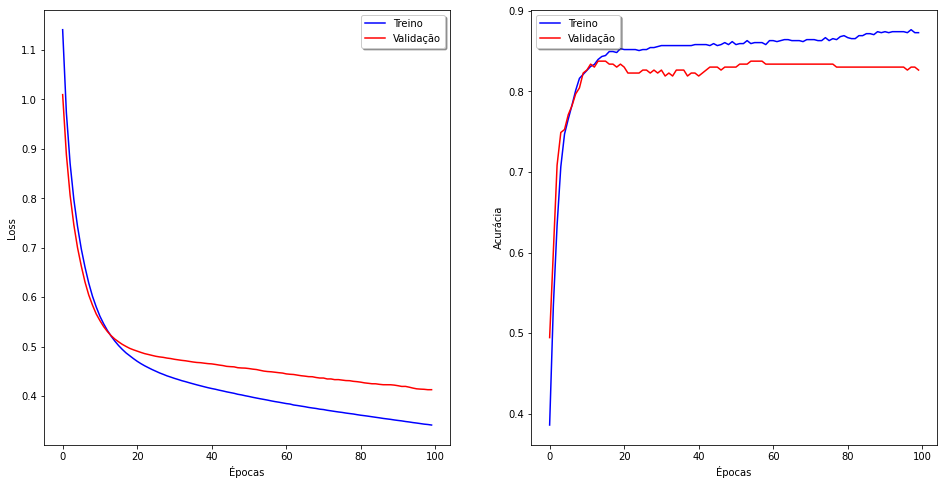

In [13]:
curvas_erro_acuracia(history1)

Loss nas últimas 20 épocas:

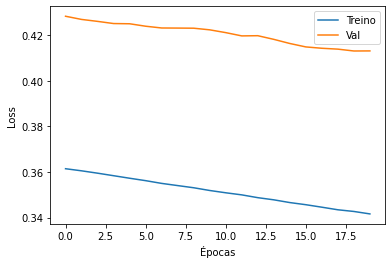

In [14]:
n_ultimas_epocas(history1, 20)

Testando o modelo com dados de teste:

In [15]:
score = model1.evaluate(x_test, y_test, verbose=0)
print("Loss do teste:", score[0])
print("Acurácia do teste:", score[1])

Loss do teste: 0.41923102736473083
Acurácia do teste: 0.8450184464454651


Para essa configuração, é possível notar que as energias dos erros de treinamento e validação decaem rapidamente nas primeiras épocas e, aproximadamente a partir da 20ª época esse decaimento se dá em valores menores, sendo que para o conjunto de validação esse valor permanece maior que o do treinamento, mas não apresenta crescimento conforme as épocas avançam, o que pode indicar que o modelo não sofre de sobreajuste. De forma inversa, o valor da acurácia aumenta conforme as épocas avançam, sendo que o conjunto de validação alcança valores menores que o de treino.
<br> Por fim, ao utilizar o conjunto de teste para avaliar o modelo, foram obtidos valores aproximados de 0,46 para a energia do erro e 0,83 para a acurácia do modelo.

### Modelo 2

MLP com 1 camada oculta com 30 neurônios, 2 camadas ocultas com 20 neurônios e 3 neurônios na camada de saída.
<br>Função de ativação das camadas ocultas: relu
<br>Função de ativação da camada de saída: softmax

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                300       
                                                                 
 dense_4 (Dense)             (None, 20)                620       
                                                                 
 dense_5 (Dense)             (None, 20)                420       
                                                                 
 dense_6 (Dense)             (None, 3)                 63        
                                                                 
Total params: 1,403
Trainable params: 1,403
Non-trainable params: 0
_________________________________________________________________


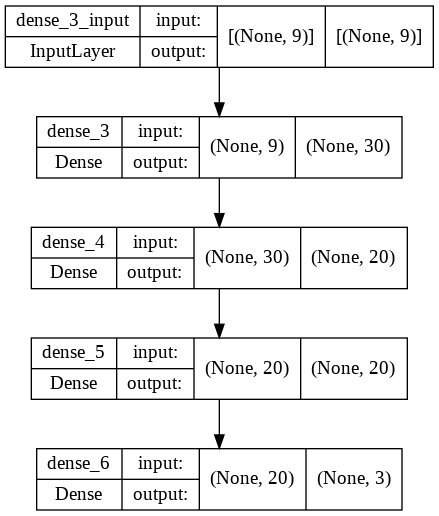

In [16]:
model2 = Sequential()
model2.add(Dense(30, activation='relu', input_shape=(9,)))
model2.add(Dense(20, activation='relu'))
model2.add(Dense(20, activation='relu'))
model2.add(Dense(3, activation='softmax'))
model2.summary()
plot_model(model2, show_shapes=True)

Modelo treinado por 100 épocas utilizando o otimizador SGD, crossentropy e acurácia como métrica de acerto:

In [17]:
model2.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, epochs=100,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/100
26/26 [==============================] - 2s 28ms/step - loss: 1.0079 - accuracy: 0.5931 - val_loss: 0.9559 - val_accuracy: 0.6642
Epoch 2/100
26/26 [==============================] - 0s 5ms/step - loss: 0.9154 - accuracy: 0.7078 - val_loss: 0.8677 - val_accuracy: 0.7159
Epoch 3/100
26/26 [==============================] - 0s 10ms/step - loss: 0.8351 - accuracy: 0.7719 - val_loss: 0.7909 - val_accuracy: 0.7712
Epoch 4/100
26/26 [==============================] - 0s 8ms/step - loss: 0.7641 - accuracy: 0.7793 - val_loss: 0.7253 - val_accuracy: 0.7860
Epoch 5/100
26/26 [==============================] - 0s 7ms/step - loss: 0.7034 - accuracy: 0.7867 - val_loss: 0.6692 - val_accuracy: 0.7970
Epoch 6/100
26/26 [==============================] - 0s 7ms/step - loss: 0.6522 - accuracy: 0.8039 - val_loss: 0.6259 - val_accuracy: 0.8044
Epoch 7/100
26/26 [==============================] - 0s 9ms/step - loss: 0.6121 - accuracy: 0.8089 - val_loss: 0.5939 - val_accuracy: 0.8044
Epoch 8/100

Gráficos com loss e acurácia ao longo das épocas:

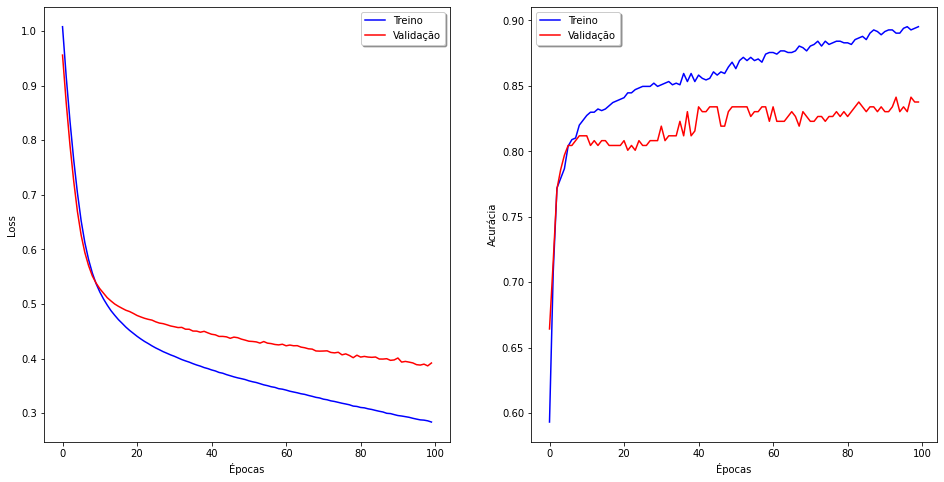

In [18]:
curvas_erro_acuracia(history2)

Loss nas últimas 20 épocas:

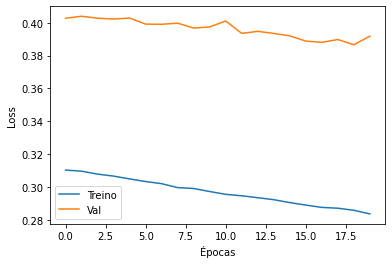

In [19]:
n_ultimas_epocas(history2, 20)

Testando o modelo com dados de teste:

In [20]:
score = model2.evaluate(x_test, y_test, verbose=0)
print("Loss do teste:", score[0])
print("Acurácia do teste:", score[1])

Loss do teste: 0.40668565034866333
Acurácia do teste: 0.8376383781433105


Ao adicionar mais uma camada oculta na rede, é possível notar que as energias dos erros de treinamento e validação também decaem rapidamente nas primeiras épocas e depois acontece em valores menores. Analisando as últimas 20 épocas do treinamento é possível notar que existem pequenas variações na energia do erro do conjunto de validação, o que pode indicar que, se aumentado o número de épocas, o modelo poderia sofre com sobreajuste.
<br> Utilizando o conjunto de teste para avaliar o modelo, foram obtidos valores aproximados de 0,39 para a energia do erro e 0,84 para a acurácia do modelo, indicando uma pequena melhoria em relação ao modelo apresentado anteriormente.

### Modelo 3

MLP com 1 camada oculta com 30 neurônios, 1 camada de Dropout, 1 camada oculta com 20 neurônios e 3 neurônios na camada de saída.
<br>Função de ativação das camadas ocultas: relu
<br>Função de ativação da camada de saída: softmax

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 30)                300       
                                                                 
 dropout (Dropout)           (None, 30)                0         
                                                                 
 dense_8 (Dense)             (None, 20)                620       
                                                                 
 dense_9 (Dense)             (None, 3)                 63        
                                                                 
Total params: 983
Trainable params: 983
Non-trainable params: 0
_________________________________________________________________


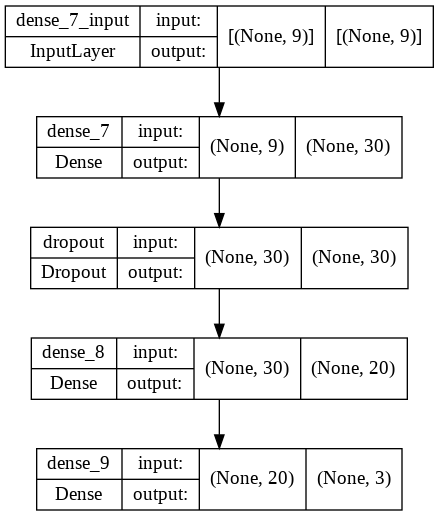

In [21]:
drop=0.2

model3 = Sequential()
model3.add(Dense(30, activation='relu', input_shape=(9,)))
model3.add(Dropout(drop))
model3.add(Dense(20, activation='relu'))
model3.add(Dense(3, activation='softmax'))
model3.summary()
plot_model(model3, show_shapes=True)

Modelo treinado por 100 épocas utilizando o otimizador SGD, crossentropy e acurácia como métrica de acerto:

In [22]:
model3.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
history3 = model3.fit(x_train, y_train, epochs=100,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/100
26/26 [==============================] - 1s 10ms/step - loss: 1.1935 - accuracy: 0.2195 - val_loss: 1.0801 - val_accuracy: 0.3653
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 1.0627 - accuracy: 0.4205 - val_loss: 0.9785 - val_accuracy: 0.6162
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 0.9709 - accuracy: 0.6067 - val_loss: 0.9057 - val_accuracy: 0.7011
Epoch 4/100
26/26 [==============================] - 0s 4ms/step - loss: 0.9090 - accuracy: 0.6535 - val_loss: 0.8459 - val_accuracy: 0.7269
Epoch 5/100
26/26 [==============================] - 0s 4ms/step - loss: 0.8638 - accuracy: 0.6831 - val_loss: 0.7985 - val_accuracy: 0.7601
Epoch 6/100
26/26 [==============================] - 0s 4ms/step - loss: 0.8077 - accuracy: 0.7201 - val_loss: 0.7541 - val_accuracy: 0.7786
Epoch 7/100
26/26 [==============================] - 0s 6ms/step - loss: 0.7695 - accuracy: 0.7509 - val_loss: 0.7172 - val_accuracy: 0.7970
Epoch 8/100


Gráficos com loss e acurácia ao longo das épocas:

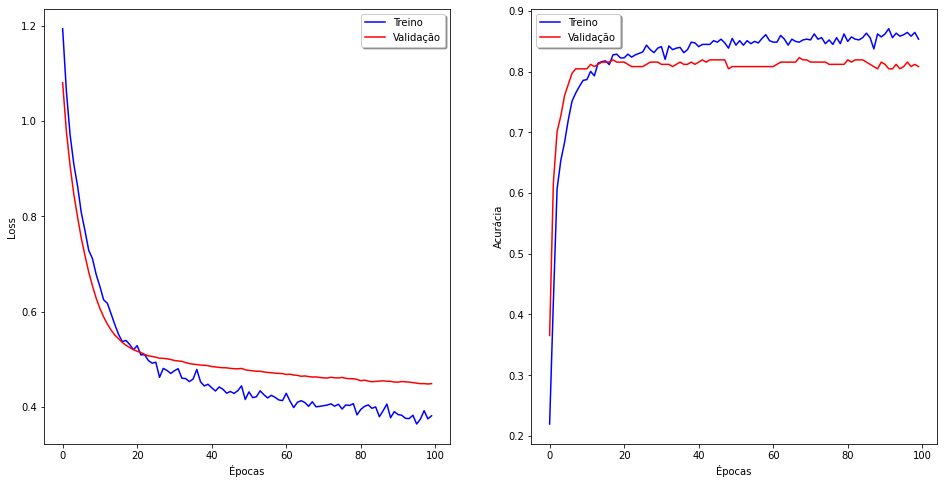

In [23]:
curvas_erro_acuracia(history3)

Loss nas últimas 20 épocas:

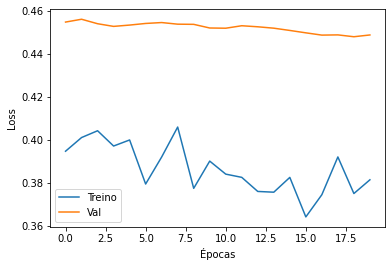

In [24]:
n_ultimas_epocas(history3, 20)

Testando o modelo com dados de teste:

In [25]:
score = model3.evaluate(x_test, y_test, verbose=0)
print("Loss do teste:", score[0])
print("Acurácia do teste:", score[1])

Loss do teste: 0.4520449936389923
Acurácia do teste: 0.8265682458877563


A adição de uma camada de Dropout levou o modelo a obter um decaimento da energia do erro um pouco menos acelerada do que nas outras configurações de rede. Entretando, é possível notar que nas últimas épocas, esse valor flutua muito para o conjunto de treino, indicando uma possível não convergência do modelo. Quanto à acurácia do modelo, também é possível notar variações nos valores para as últimas épocas, principalmente em relação aos dados de treinamento.
<br> Para o conjunto de teste, obteve-se 0,44 para a energia do erro e 0,84 de acurácia, indicando um modelo que perfoma melhor que o modelo 1, mas que em termos de energia do erro, é superado pelo modelo 2.

### Modelo 4

MLP com 1 camada oculta com 30 neurônios, 1 camada oculta com 20 neurônios e 3 neurônios na camada de saída.
<br>Função de ativação das camadas ocultas: sigmoid
<br>Função de ativação da camada de saída: softmax

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 30)                300       
                                                                 
 dense_11 (Dense)            (None, 20)                620       
                                                                 
 dense_12 (Dense)            (None, 3)                 63        
                                                                 
Total params: 983
Trainable params: 983
Non-trainable params: 0
_________________________________________________________________


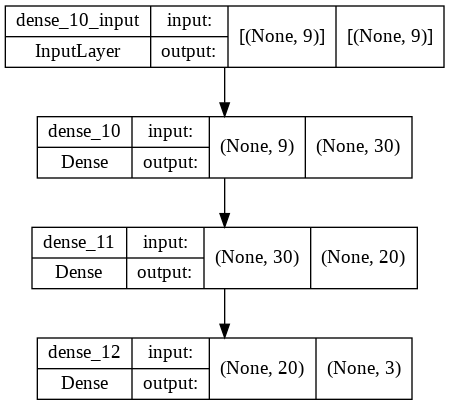

In [26]:
model4 = Sequential()
model4.add(Dense(30, activation='sigmoid', input_shape=(9,)))
model4.add(Dense(20, activation='sigmoid'))
model4.add(Dense(3, activation='softmax'))
model4.summary()
plot_model(model4, show_shapes=True)

Modelo treinado por 100 épocas utilizando o otimizador SGD, crossentropy e acurácia como métrica de acerto:

In [27]:
model4.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
history4 = model4.fit(x_train, y_train, epochs=100,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/100
26/26 [==============================] - 1s 10ms/step - loss: 1.5108 - accuracy: 0.0764 - val_loss: 1.2222 - val_accuracy: 0.1218
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 1.1152 - accuracy: 0.4858 - val_loss: 1.0138 - val_accuracy: 0.5424
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 0.9873 - accuracy: 0.5216 - val_loss: 0.9338 - val_accuracy: 0.5424
Epoch 4/100
26/26 [==============================] - 0s 3ms/step - loss: 0.9357 - accuracy: 0.5216 - val_loss: 0.8986 - val_accuracy: 0.5424
Epoch 5/100
26/26 [==============================] - 0s 3ms/step - loss: 0.9126 - accuracy: 0.5216 - val_loss: 0.8788 - val_accuracy: 0.5424
Epoch 6/100
26/26 [==============================] - 0s 3ms/step - loss: 0.9000 - accuracy: 0.5216 - val_loss: 0.8682 - val_accuracy: 0.5424
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - loss: 0.8932 - accuracy: 0.5216 - val_loss: 0.8608 - val_accuracy: 0.5424
Epoch 8/100


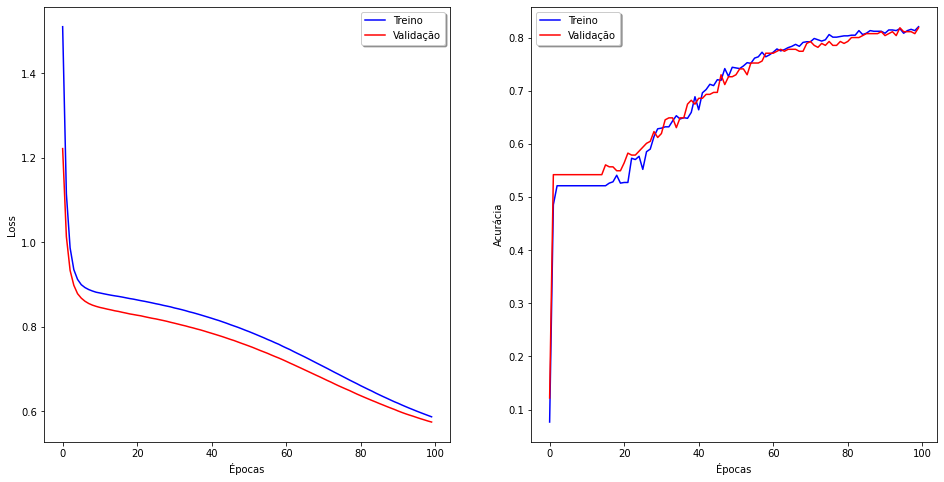

In [28]:
curvas_erro_acuracia(history4)

Loss nas últimas 20 épocas:

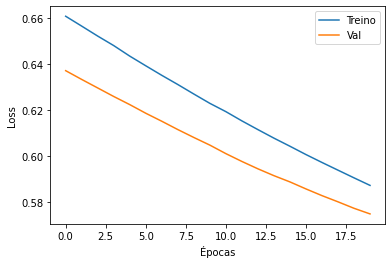

In [29]:
n_ultimas_epocas(history4, 20)

Testando o modelo com dados de teste:

In [30]:
score = model4.evaluate(x_test, y_test, verbose=0)
print("Loss do teste:", score[0])
print("Acurácia do teste:", score[1])

Loss do teste: 0.6350603103637695
Acurácia do teste: 0.7970479726791382


Através da alteração da função de ativação das camadas ocultas da rede é possível notar que a energia do erro decaí de forma quase constante ao longo das épocas, apresentando valores mais altos para o conjunto de treino em relação aos de validação. É possível hipotetizar que a rede irá convergir caso o número de épocas seja aumentado. Também é possível observar que os valores de acurácia aumentam nas últimas épocas do treinamento.
<br> Considerando o conjunto de teste, a energia do erro do modelo foi de 0,62 e o valor de acurácia foi de 0,77. Se comparado aos outros modelos, esse é o que obteve a pior performance, mas possívelmente influênciado pelo número de épocas.

### Modelo 5

MLP com 1 camada oculta com 30 neurônios, 1 camada oculta com 20 neurônios, 1 camada oculta com 10 neurônios e regularização e 3 neurônios na camada de saída.
<br>Função de ativação das camadas ocultas: relu
<br>Função de ativação da camada de saída: softmax

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 30)                300       
                                                                 
 dense_14 (Dense)            (None, 20)                620       
                                                                 
 dense_15 (Dense)            (None, 10)                210       
                                                                 
 dense_16 (Dense)            (None, 3)                 33        
                                                                 
Total params: 1,163
Trainable params: 1,163
Non-trainable params: 0
_________________________________________________________________


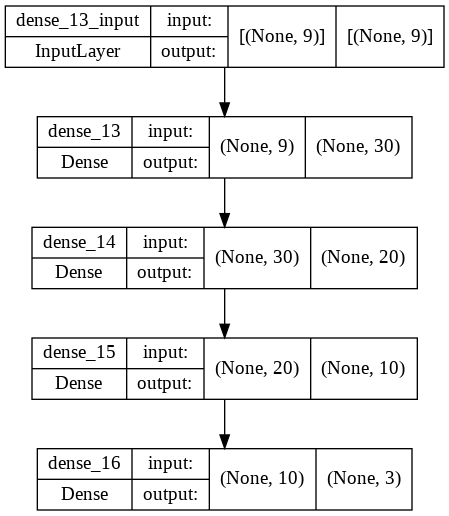

In [31]:
fl2 = 0.6

model5 = Sequential()
model5.add(Dense(30, activation='relu', input_shape=(9,)))
model5.add(Dense(20, activation='relu'))
model5.add(Dense(10, activation='relu', kernel_regularizer=l2(fl2)))
model5.add(Dense(3, activation='softmax'))
model5.summary()
plot_model(model5, show_shapes=True)

Modelo treinado por 100 épocas utilizando o otimizador SGD, crossentropy e acurácia como métrica de acerto:

In [32]:
model5.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
history5 = model5.fit(x_train, y_train, epochs=100,
                    verbose=1,
                    validation_data=(x_val, y_val))

Epoch 1/100
26/26 [==============================] - 1s 9ms/step - loss: 7.1533 - accuracy: 0.3539 - val_loss: 5.3326 - val_accuracy: 0.5609
Epoch 2/100
26/26 [==============================] - 0s 3ms/step - loss: 4.2739 - accuracy: 0.6067 - val_loss: 3.3041 - val_accuracy: 0.6458
Epoch 3/100
26/26 [==============================] - 0s 3ms/step - loss: 2.7411 - accuracy: 0.5672 - val_loss: 2.2174 - val_accuracy: 0.5572
Epoch 4/100
26/26 [==============================] - 0s 3ms/step - loss: 1.9179 - accuracy: 0.5240 - val_loss: 1.6317 - val_accuracy: 0.5424
Epoch 5/100
26/26 [==============================] - 0s 3ms/step - loss: 1.4742 - accuracy: 0.5216 - val_loss: 1.3142 - val_accuracy: 0.5424
Epoch 6/100
26/26 [==============================] - 0s 3ms/step - loss: 1.2331 - accuracy: 0.5216 - val_loss: 1.1399 - val_accuracy: 0.5424
Epoch 7/100
26/26 [==============================] - 0s 3ms/step - loss: 1.1006 - accuracy: 0.5216 - val_loss: 1.0428 - val_accuracy: 0.5424
Epoch 8/100
2

Loss nas últimas 20 épocas:

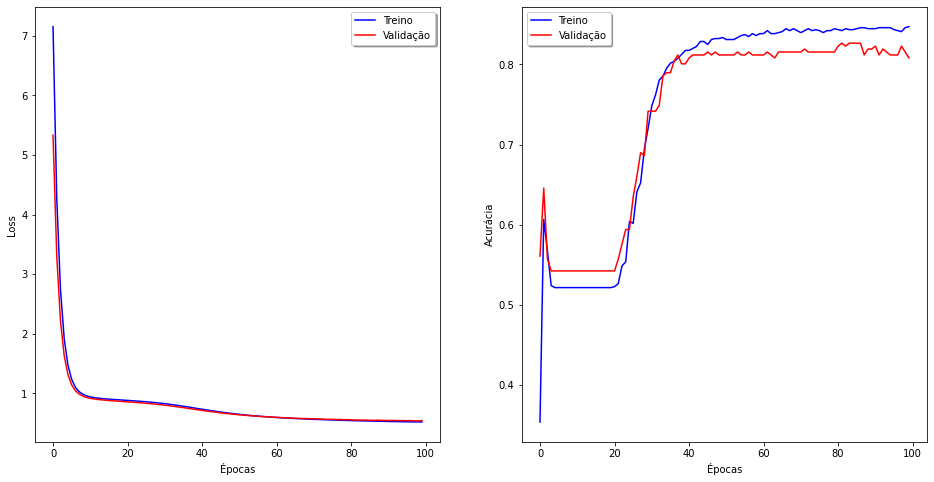

In [33]:
curvas_erro_acuracia(history5)

Loss nas últimas 20 épocas:

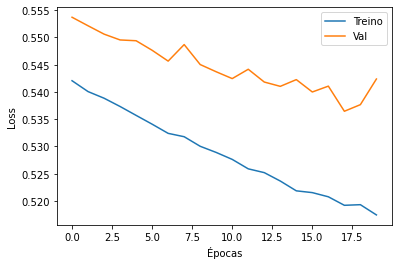

In [34]:
n_ultimas_epocas(history5, 20)

Testando o modelo com dados de teste:

In [35]:
score = model5.evaluate(x_test, y_test, verbose=0)
print("Loss do teste:", score[0])
print("Acurácia do teste:", score[1])

Loss do teste: 0.5813829898834229
Acurácia do teste: 0.8081181049346924


Ao incluir uma camada na rede que aplica regularização, foi possível notar um decaimento acelerado na energia do erro. Quanto à acurácia do modelo, é possível perceber que, para últimas épocas, o valor continua aumentando para o conjunto de treinamento, enquanto os valores para o conjunto de validação tendem a permanecer numa mesma faixa.
<br>Em relação aos dados de teste, o modelo apresentou uma energia de erro de 0,58 e acurácia de 0,81, perfomando melhor que o modelo 4.

## Considerações Finais

O intuito desse notebook jupyter foi apresentar o emprego de diferentes topologias de redes MLP para a tarefa de classificação. Dado o conjunto de dados apresentado, o modelo que melhor performou a tarefa foi o modelo 2, uma rede MLP com 1 camada oculta com 30 neurônios, 2 camadas ocultas com 20 neurônios e 3 neurônios na camada de saída, empregando a relu como função de ativação das camadas ocultas e a função softmax na camada de saída. Esse modelo foi treinado por 100 épocas utilizando o otimizador SGD, crossentropy e acurácia como métrica de acerto. Nessa configuração, foi obtido um valor de 0.39 para a energia do erro e de 0.85 de acurácia com o conjunto de teste. Variações de topologia da rede resultaram em valores mais altos de energia do erro e perda de acurácia, sendo a rede com alteração da função de ativação das camadas ocultas para sigmoid a que apresentou os menores valores de acurácia. Para aprofundar o estudo desse problema, diferentes hyperparâmetros poderiam ter um ajuste fino aplicado, como aumento da quantidade de épocas ou variação do valor da taxa de aprendizagem. 